<a href="https://colab.research.google.com/github/Nouhaila2002/Dog-vs-Cat-Classification/blob/main/Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Dog vs Cat Dataset from Kaggle**

In [ ]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:04<00:00, 220MB/s]
100% 812M/812M [00:04<00:00, 190MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))

file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8507.jpg', 'cat.1419.jpg', 'dog.11790.jpg', 'cat.11363.jpg', 'cat.509.jpg', 'dog.866.jpg', 'dog.1710.jpg', 'cat.409.jpg', 'cat.7242.jpg', 'dog.9230.jpg', 'dog.5686.jpg', 'cat.8391.jpg', 'cat.1158.jpg', 'dog.11963.jpg', 'cat.5088.jpg', 'cat.702.jpg', 'cat.1020.jpg', 'cat.7853.jpg', 'dog.9570.jpg', 'cat.11843.jpg', 'dog.5770.jpg', 'cat.11165.jpg', 'cat.7748.jpg', 'cat.6941.jpg', 'dog.6013.jpg', 'dog.8480.jpg', 'cat.1477.jpg', 'dog.4918.jpg', 'dog.8507.jpg', 'dog.2691.jpg', 'cat.672.jpg', 'cat.6029.jpg', 'cat.1285.jpg', 'cat.642.jpg', 'cat.11246.jpg', 'dog.6800.jpg', 'dog.6479.jpg', 'cat.11286.jpg', 'dog.7248.jpg', 'dog.1012.jpg', 'cat.11009.jpg', 'dog.6881.jpg', 'cat.5726.jpg', 'cat.8998.jpg', 'cat.622.jpg', 'cat.7953.jpg', 'dog.12071.jpg', 'cat.6918.jpg', 'dog.1975.jpg', 'cat.3764.jpg', 'dog.7329.jpg', 'cat.6855.jpg', 'cat.9260.jpg', 'dog.1149.jpg', 'dog.4238.jpg', 'dog.4509.jpg', 'cat.5622.jpg', 'cat.5171.jpg', 'cat.7759.jpg', 'dog.5809.jpg', 'cat.1836.jpg', 'dog.7602.jpg', 'cat.

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

***Displaying the images of dogs and cats***

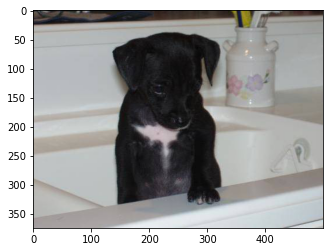

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

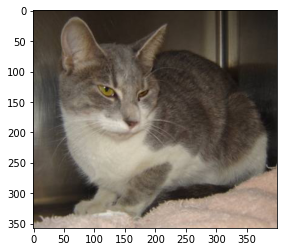

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
dog
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

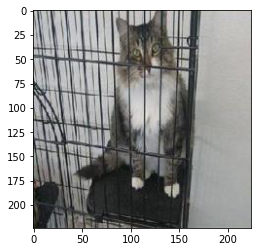

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.4914.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.8507.jpg', 'cat.1419.jpg', 'dog.11790.jpg', 'cat.11363.jpg', 'cat.509.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1031  969]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[214 164 112]
   [217 167 115]
   [222 172 120]
   ...
   [242 171  74]
   [242 173  76]
   [243 174  77]]

  [[212 162 110]
   [214 164 112]
   [218 168 116]
   ...
   [239 168  71]
   [238 169  72]
   [239 170  73]]

  [[212 159 108]
   [211 158 107]
   [214 162 109]
   ...
   [232 162  68]
   [233 164  67]
   [233 164  67]]

  ...

  [[192  74  73]
   [192  74  73]
   [191  73  72]
   ...
   [160  59  51]
   [160  59  51]
   [160  59  51]]

  [[193  75  74]
   [192  74  73]
   [192  74  73]
   ...
   [167  63  56]
   [167  63  56]
   [167  63  56]]

  [[193  75  74]
   [192  74  73]
   [192  74  73]
   ...
   [171  67  60]
   [171  67  60]
   [171  67  60]]]


 [[[ 21  22  18]
   [ 19  20  16]
   [ 18  19  15]
   ...
   [ 25  29  17]
   [ 25  29  17]
   [ 25  29  17]]

  [[ 21  22  18]
   [ 20  21  17]
   [ 19  20  16]
   ...
   [ 25  29  17]
   [ 25  29  17]
   [ 25  29  17]]

  [[ 22  23  19]
   [ 20  21  17]
   [ 20  21  17]
   ...
   [ 27  31  19]
   [ 27  31  19]
   [ 27  31

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.05490196 0.04705882 0.04313725]
   [0.05882353 0.05098039 0.04705882]
   [0.05882353 0.05098039 0.04705882]
   ...
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]]

  [[0.05098039 0.04313725 0.03921569]
   [0.05490196 0.04705882 0.04313725]
   [0.05882353 0.05098039 0.04705882]
   ...
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]]

  [[0.0627451  0.05490196 0.05098039]
   [0.0627451  0.05490196 0.05098039]
   [0.0627451  0.05490196 0.05490196]
   ...
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]
   [0.2        0.20784314 0.20784314]]

  ...

  [[0.50980392 0.36470588 0.42745098]
   [0.51764706 0.37254902 0.43529412]
   [0.52156863 0.37647059 0.43921569]
   ...
   [0.53333333 0.38823529 0.45098039]
   [0.54117647 0.39607843 0.45882353]
   [0.56078431 0.41568627 0.47843137]]

  [[0.45882353 0.31372549 0.37647059]
   [0.4

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

#download the model weights
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2 #how many types of images wwe have

model = tf.keras.Sequential([
    
    pretrained_model, #my first layer
    tf.keras.layers.Dense(num_of_classes) #my output layer

])

#tell you what is the layer that you have
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    #normal label encoder , one hot encoder labels
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 51s 907ms/step - loss: 0.2614 - acc: 0.8925
Epoch 2/5
50/50 [==============================] - 48s 955ms/step - loss: 0.0875 - acc: 0.9700
Epoch 3/5
50/50 [==============================] - 46s 924ms/step - loss: 0.0680 - acc: 0.9775
Epoch 4/5
50/50 [==============================] - 47s 940ms/step - loss: 0.0516 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 47s 947ms/step - loss: 0.0414 - acc: 0.9894


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 20s 2s/step - loss: 0.0505 - acc: 0.9850
Test Loss = 0.05047382786870003
Test Accuracy = 0.9850000143051147


**Predictive System**

Path of the image to be predicted: /content/cat.jpg


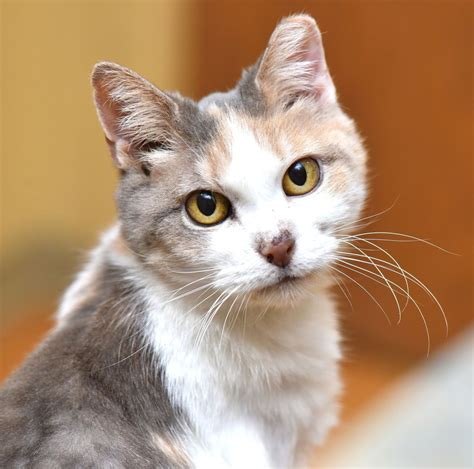

[[ 6.336503  -3.3038342]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path) #converting the image to an array

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

# to tell the model that i'm making prediction for only one image (1)
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)


print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


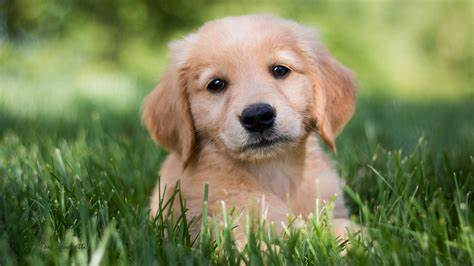

[[-4.3705997  3.7640553]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')